##CUSTOMER CHURN ANALYSIS


###1. DATA EXPLORARTION
Step 1: Importing Data

In [65]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn import preprocessing

In [66]:
#Read and upload
df=pd.read_csv('/content/CustomerChurn (1).csv')

#df = pd.read_excel('/content/CustomerChurn.excel')  -If Excel Format

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###Step 2: Check attributes of data like shape, columns, data types

In [70]:
#Shapes
df.shape
#(Rows, Columns)


(7043, 21)

In [71]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [72]:
#Data Types
df.dtypes

#Object = String
#int64 = Integer
#float64 = Float


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Insights:

TotalCharges is Object whereas it should be numeric, keep it in mind.

In [73]:
#Check the descriptive stats of numerica columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Insights:

Senior Citizen is actually categorical(binary, yes/no) but it is numeric, hence its numeric stats are meaningless
75% of ppl stay less than 55months
Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month (Avg Charges= 64.7 whereas 25% pay 89.85)

###Step 3: Analysing Churn

In [74]:
#Since I know this df has a column abt churn so I will check the column
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [75]:
#Churn Distribution in %age (Manual)
(df['Churn'].value_counts()/len(df))*100

,count
Churn,
No,73.463013
Yes,26.536987


Text(0.5, 1.0, 'Count of TARGET Variable per category')

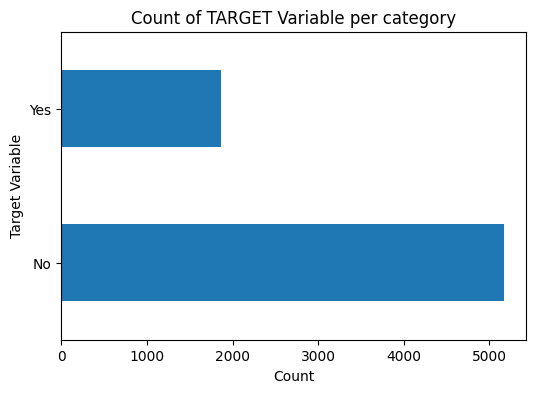

In [76]:
#Churn Distribution in %age (Visual= Bar Chart)
df['Churn'].value_counts().plot(kind='barh', figsize=(6, 4)) #barh=hori, #bar=verti
plt.xlabel('Count')
plt.ylabel('Target Variable')
plt.title('Count of TARGET Variable per category')

In [77]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Insights:

Data is highly imbalanced, ratio = 73:27
So we analyse the data with other features while taking the target values separately to get some insights.

###Step 4: Checking Null Values

In [78]:
#Concise Summary of df (Use verbose= True, if list is too long)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


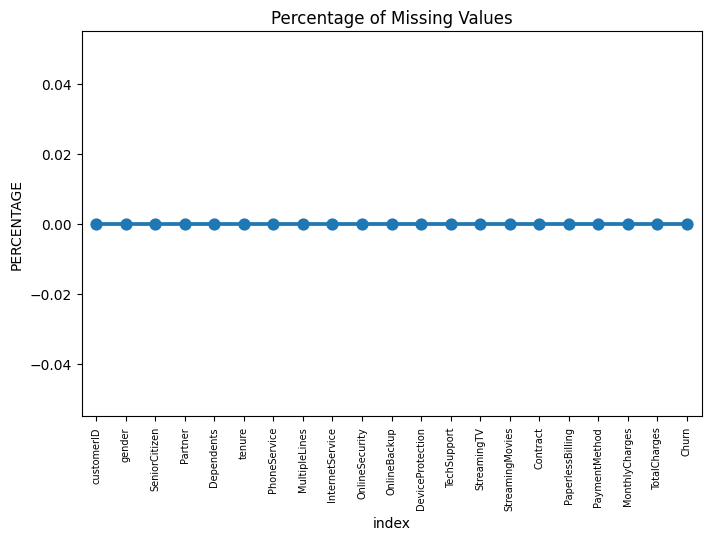

In [79]:
#Visualisation of missing data values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(8, 5))
ax = sns.pointplot(x="index", y=0, data=missing)
plt.xticks(rotation =90, fontsize =7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()


Insights:

Need to convery TotalCharges into numeric and then check df.info(0) again for nulls.

###Step 5: Missing Data - Initial Intuition
//Here, no missing data values(in original df but we manually deleted some columns)(Check for TotalCharges later)
General Thumb Rule:

For featuers with less missing values - Use Regression tp predict missing values
For featuers with high(>70%) missing values - Drop the column,
Unless that column is directly in relationship with some other column, eg Don't drop Car_Type if there is a Is_Car column

##2. Data Cleaning

Step 1: Create NEW DF of base data for manupulation & processing

In [80]:
new_df=df.copy()

In [81]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
new_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [83]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
new_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Step 2: Converting DataTypes, Total Charges should be numeric amount. Let's convert it to numerical data type

In [85]:
#Conversion of Total Charges
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')
#it is important to put coerce, it will put NAN where a string can't be converted into number
new_df.isnull().sum() # similar as df.info(), directly gives number of null values.


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Step 3: Checking Null Values

In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insights:

1. 11 Null values after conversion = 11/7043 = 0.15%  
2. Null Values < 1% hence, we can either impute it using mean or delete those rows of null values since it wont affect the data
3. If it were greater than 5% then we cant delete

. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [87]:
new_df.loc[new_df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Step 4: Missing Value Treatment

In [88]:
#Removing missing values
new_df.dropna(how ='any', inplace=True)
# how = 'any' means if any valye in row is null, delete the entire row


Step 5: Create Tenure Bins

In [89]:
#Why? This is intuitive and hit&trial and this step comes with experience.


#Max Tenure
print(new_df['tenure'].max())

72


In [90]:
#Create Labels(Using For loops)
labels = ['{0} - {1}'.format(i, i + 11) for i in range(1, 72, 12)]

print(labels)


['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


Code Explanation:
Step 1: range(1, 72, 12)

→ gives numbers starting from 1, increasing by 12 each time, until 72 (excluded). So: [1, 13, 25, 37, 49, 61]

Step 2: for i in range(...)

→ loops through each of those numbers (i = 1, 13, 25, 37, 49, 61).

Step 3: '{0} - {1}'.format(i, i + 11)

→ creates a string showing a range from i to i + 11. Example:

when i = 1 → '1 - 12'

when i = 13 → '13 - 24' and so on.

In [91]:
#Group tenure in bins of 12 months
new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right=False, labels=labels)

Explanaion of Code

1.new_df.tenure → the numeric column you’re grouping (e.g., months/years of tenure).

2.range(1, 80, 12) → defines the bin edges: [1, 13, 25, 37, 49, 61, 73]. So, you’re making 12-wide intervals from 1 up to 79.

right=False → means each bin includes the left edge but not the right one (e.g. [1, 13) includes 1–12).
labels=labels → assigns human-readable names (like '1 - 12', '13 - 24', etc.) to each bin.

In [92]:

#Check Bins and values
new_df['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


Step 6. Removing Columns not req for analysis



In [93]:
#Drop column customerId and Tenure
new_df.drop(columns= ['customerID', 'tenure'], axis=1, inplace=True)


In [94]:
#Check data
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


##3. Data Analysis


###3.1 Univariate Analysis

In [95]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Step 1: Create Univariate chart of all categorical data(X/ Indepenedent Variable(columns)) against churn(Y/ Dependent Variable(column))
**RESUABLE CODE FOR ALL EDA**


In [96]:
new_df.Churn.value_counts()/len(new_df)*100

,count
Churn,
No,73.421502
Yes,26.578498


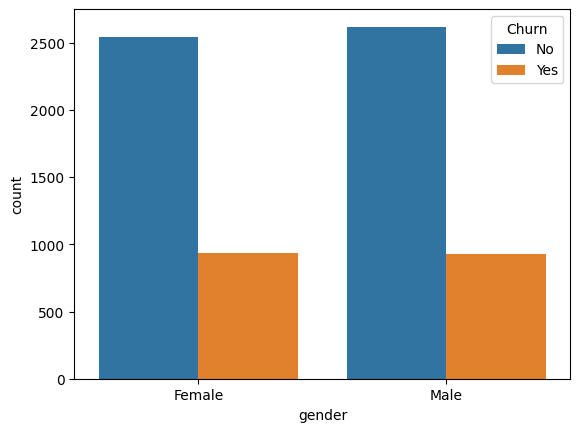

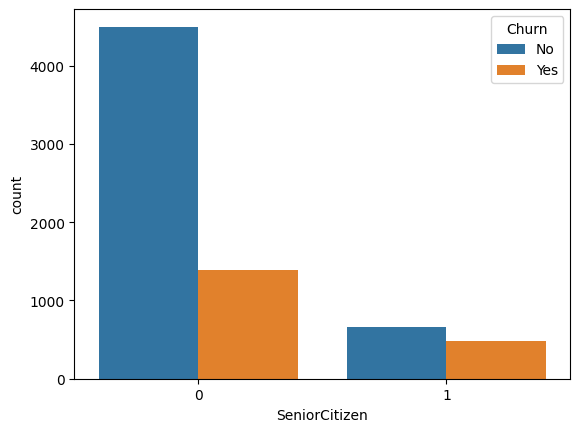

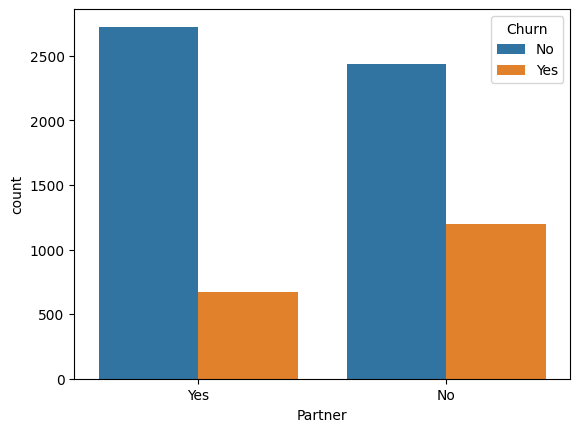

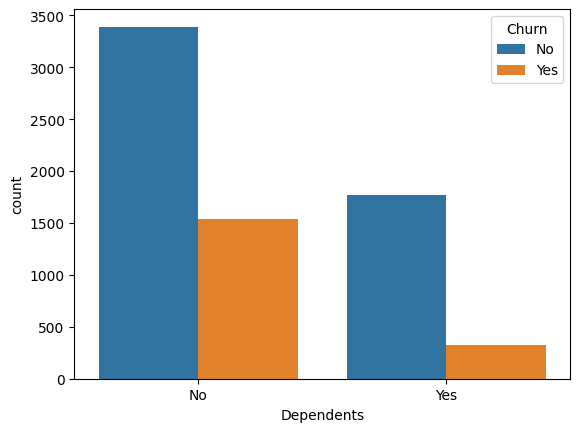

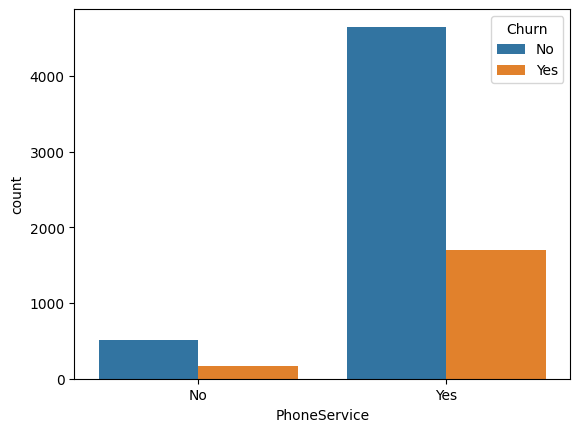

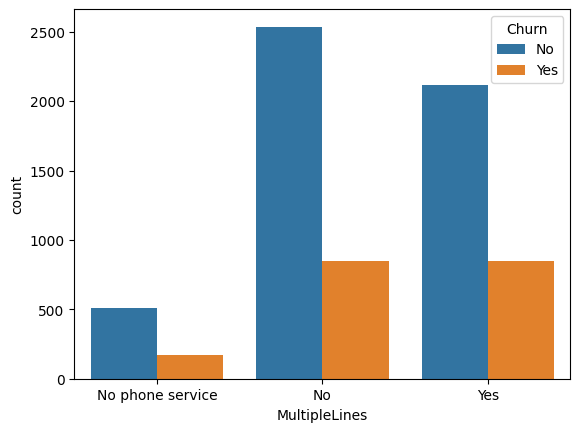

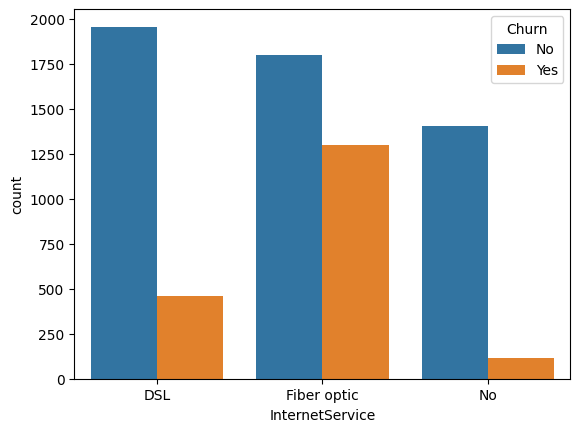

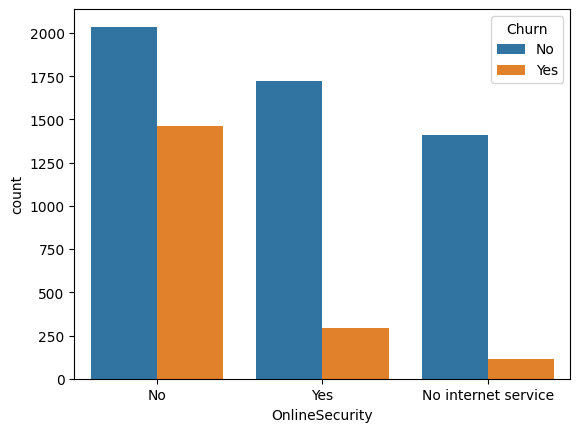

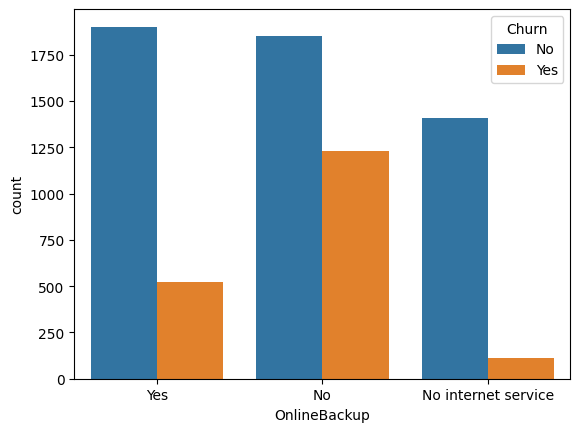

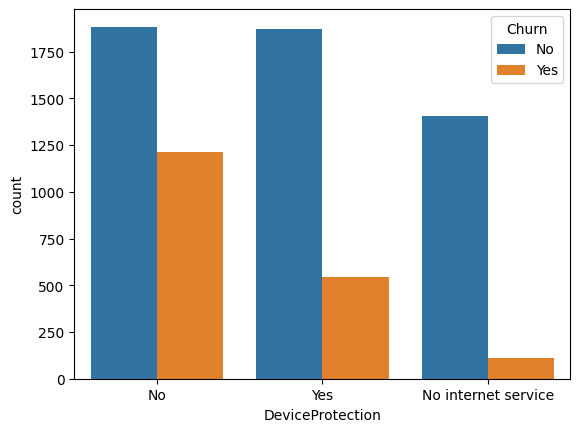

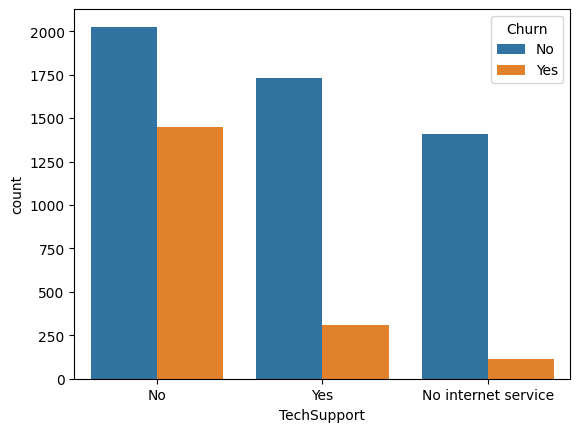

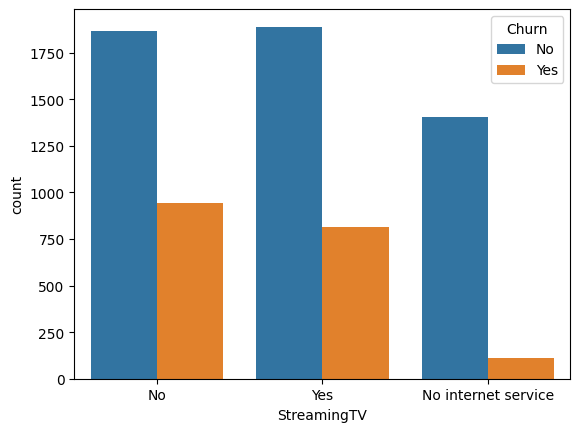

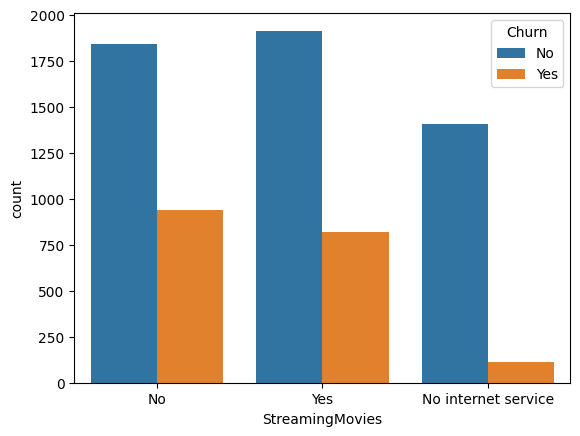

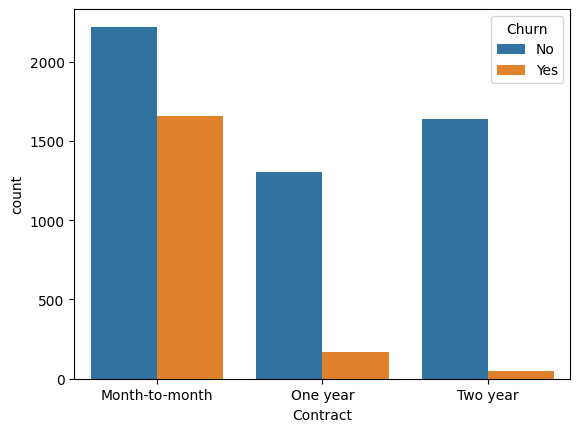

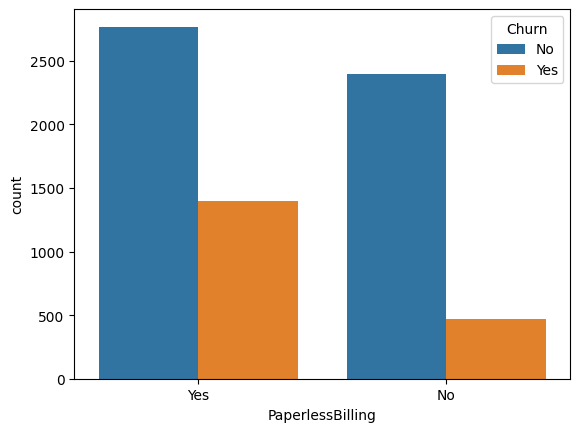

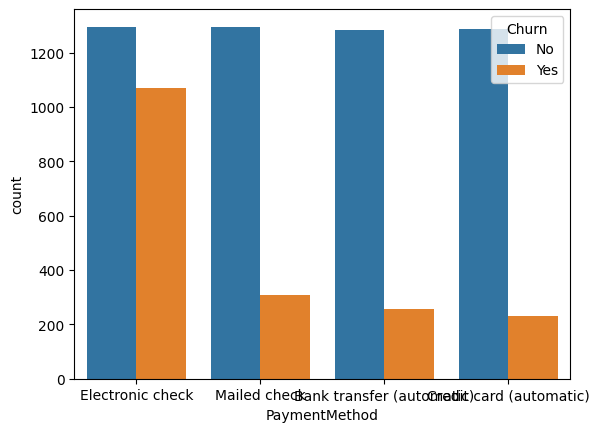

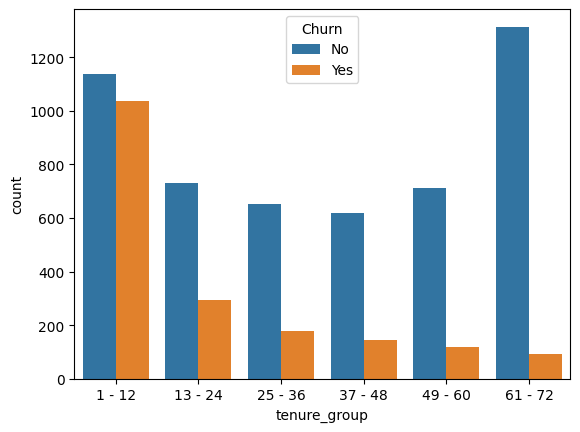

In [97]:
#Which columns not included= Churn(Y), TotalCharges(numeric), MonthlyCharges(Numeric)

#Code for all the Graphs of Categorical Columns vs Churn
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
   plt.figure(i)
   sns.countplot(data=new_df, x=predictor, hue='Churn')
   #predictor= Columns, i=Number of columns, Hue=Churn

Few Insights:

1.Same for both genders

2.Senior Citizens churn more in %age

3.Partner: People with no partner churn more in %age

4.Contract: Monthly conracts are more likely to churn

5.People who pay with electronic cheque are more likely to churn
Etc
Note: If you do not get an insight from a particular X, u need to do bivariate and  multivariate analysis to get insights from it.

###3.2 Numerical Analysis
Step 1: Univariate Numerical Analysis


In [98]:
#Male and Female in Population
new_df.gender.value_counts()

,count
gender,
Male,3549
Female,3483


In [99]:
#Disecting Churned and Not Churned
new_df1_target0= new_df[new_df['Churn']=='No']
new_df1_target1= new_df[new_df['Churn']=='Yes']

In [100]:
#Male and Female Churners
new_df1_target1.gender.value_counts()

,count
gender,
Female,939
Male,930


Insight:
Ratio of male and female is almost same for both churners and original data

In [101]:
#Payment Method vs Churn
pd.crosstab(new_df.PaymentMethod, new_df.Churn)
#pd.crosstab(new_df.PaymentMethod, new_df.Churn) creates a cross-tabulation, or contingency table, that shows the frequency distribution of Churn status across each PaymentMethod


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


Insights:

People with payment method as Electronic check are more churners

Step 2: For Numerical Analysis convert target variable(Y) into numerical attribute
I.E. Yes = 1, No = 0

In [102]:
#Conversion of Target Variable(Y) into numerical data from categorical
new_df['Churn'] = np.where(new_df.Churn == 'Yes', 1, 0)

In [103]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Step 3: Convert all categorical variables into dummy variables to allow numerical analysis


In [104]:
#USING DUMMY ENCODING
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [105]:
#Relationship between MonthyCharges and TotalCharges

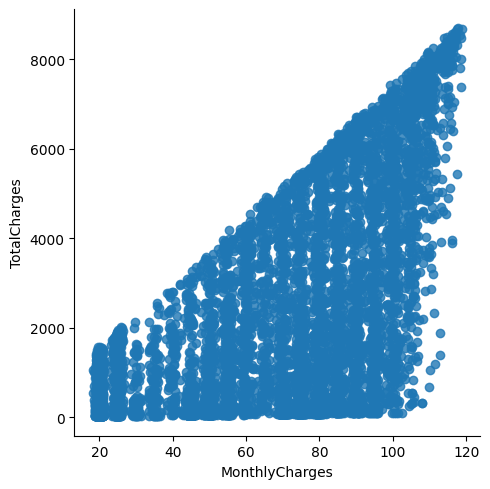

In [106]:
#Scatter Plot between Monthly Charges&TotalCharges
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [107]:
#Calculate the Correlation between them
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])


np.float64(0.6510648032262027)

Insights:
Total Charges increase as Monthly Charges increase - as expected.

Positively Correlated and directly proportional

In [108]:
#Churn By Monthly Charges and Total Charges

/tmp/ipython-input-1984123775.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn"] == 0], color="Red", shade=True)
/tmp/ipython-input-1984123775.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn"] == 1], ax=Mth, color="Blue", shade=True)


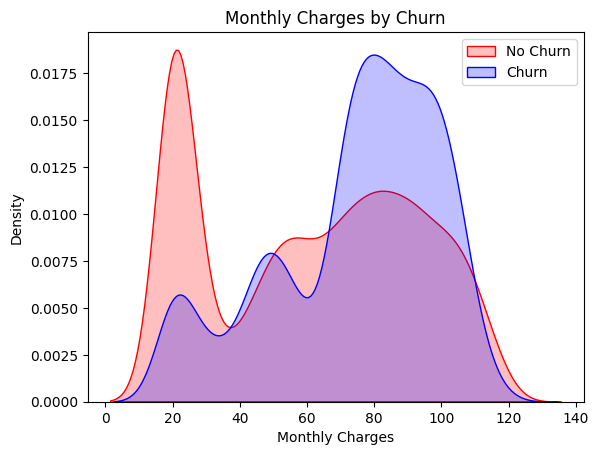

In [109]:
# Relationship between MonthyCharges and Churn using KDplot


#Kernel Density Plot between Monthly charges and churn and not churn
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn"] == 0], color="Red", shade=True)

Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn"] == 1], ax=Mth, color="Blue", shade=True)

Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_xlabel("Monthly Charges")
Mth.set_ylabel("Density")
Mth.set_title("Monthly Charges by Churn")

plt.show()

Insight:

As monthly charges increase, churn increases

In [110]:
# Relationship between Total Charges and Churn using KDplot

/tmp/ipython-input-3134958889.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn"] == 0], color="Red", shade=True)
/tmp/ipython-input-3134958889.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn"] == 1], ax=Mth, color="Blue", shade=True)


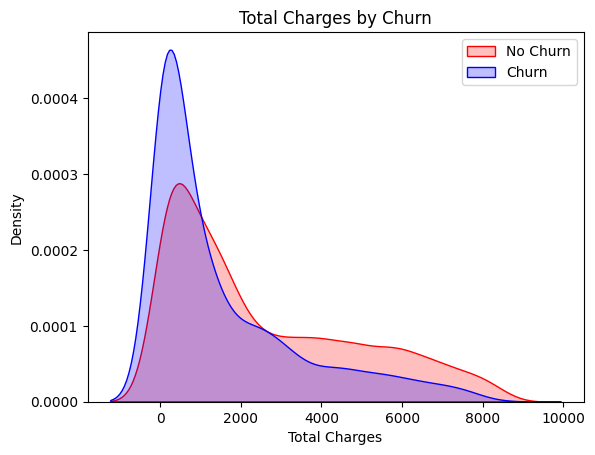

In [111]:
#Kernel Density Plot between Total charges and churn and not churn
Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn"] == 0], color="Red", shade=True)

Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn"] == 1], ax=Mth, color="Blue", shade=True)

Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_xlabel("Total Charges")
Mth.set_ylabel("Density")
Mth.set_title("Total Charges by Churn")


plt.show()

Insights:

1.Surprisingly, higher churners at lower total charges

2.Whereas, there is positive correlation between Monthly and Total Charges, the kdplot shows a different insight

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [112]:
# Relationship between Tenure and Churn using KDplot
#Since, no tenure column in new fd, we need old df.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


/tmp/ipython-input-1210812028.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.tenure[df["Churn"] == "No"], color="Red", shade=True)
/tmp/ipython-input-1210812028.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.tenure[df["Churn"] == "Yes"], ax=Mth, color="Blue", shade=True)


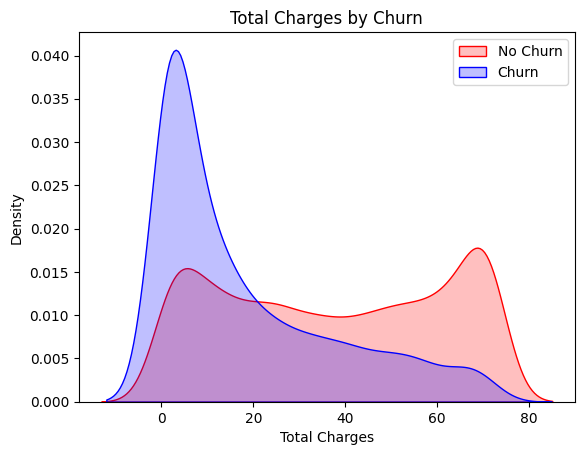

In [113]:
#Kernel Density Plot between Tenure and churn and not churn
Mth = sns.kdeplot(df.tenure[df["Churn"] == "No"], color="Red", shade=True)

Mth = sns.kdeplot(df.tenure[df["Churn"] == "Yes"], ax=Mth, color="Blue", shade=True)

Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_xlabel("Total Charges")
Mth.set_ylabel("Density")
Mth.set_title("Total Charges by Churn")


plt.show()

<Axes: >

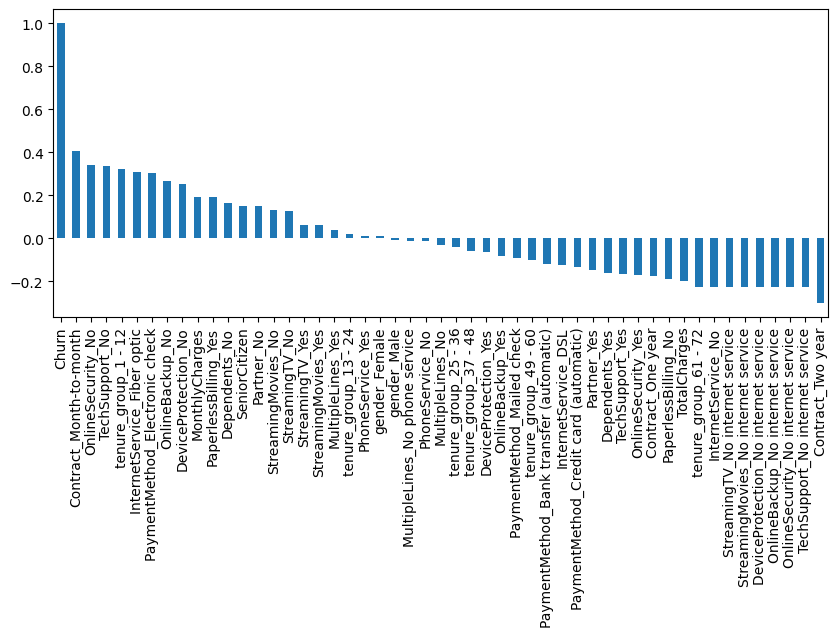

In [114]:
#Correlation Matrix Bar Chart between (All Y) vs X
#Churn vs All
plt.figure(figsize=(10, 4))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


Insights:

High Churners: Contract-MonthtoMonth, No Online Security, No Tech Support, Tenure Group(1-12), Fiber Optic Internet, Electronic check, No ONline Backup, etc

Low Chruners: Two year contract, Tenure Group(61-72) etc.

No Affect: Gender, Availabaility of Phone Service, etc

<Axes: >

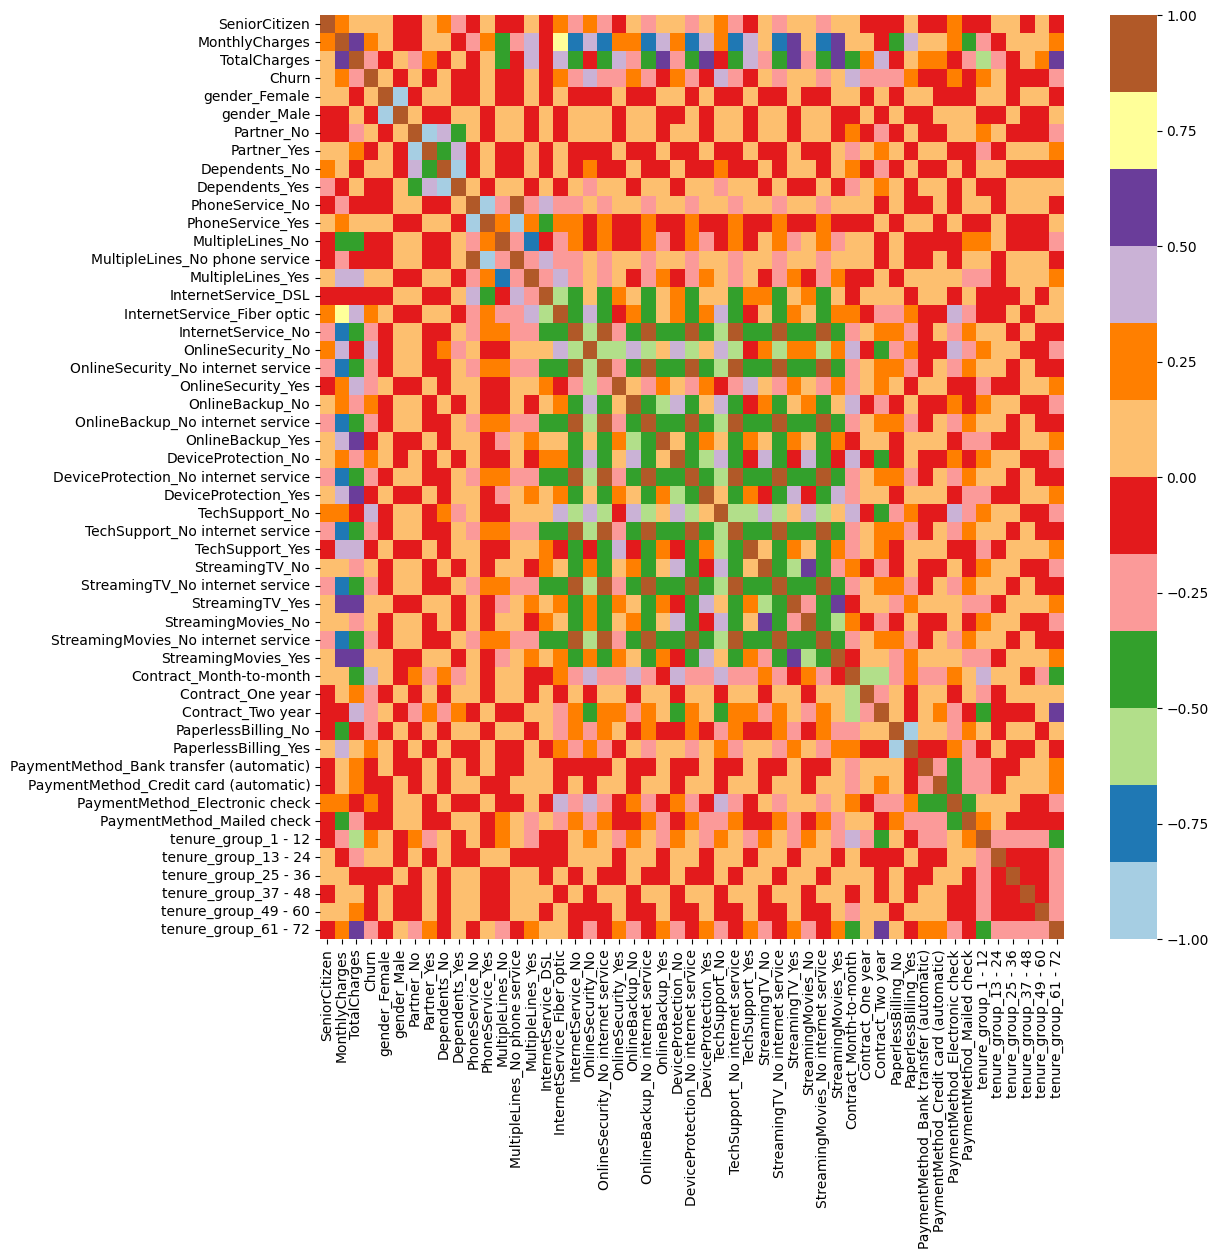

In [115]:
#Correlation Matrix HeatMap between All vs All
#Every Column against Every Column
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap='Paired')

###3.3 Bivariate Analysis
Step 1: Bisect Churn and Not Churn and Set it as Target Variable

In [64]:
#Bisecting
new_df1_target0=new_df.loc[new_df["Churn"]==0]
new_df1_target1=new_df.loc[new_df["Churn"]==1]

In [117]:
#Count of Not Churned
len(new_df1_target0)

5163

In [116]:
len(new_df1_target1)

1869

Step 2: Generate all BiVariate Graph against Target Variable for both Cases


**REUSABLE CODE FOR ALL EDA**

In [125]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')

    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # ✅ Fix 1: Use actual data from dataframe
    temp = df[hue] if hue else df[col]

    fig, ax = plt.subplots()

    # ✅ Fix 2: Simplify width logic
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.title(title)

    # ✅ Main plot
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        palette='bright'
    )

    plt.show()
'''
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()
    '''

'\ndef uniplot(df,col,title,hue =None):\n    \n    sns.set_style(\'whitegrid\')\n    sns.set_context(\'talk\')\n    plt.rcParams["axes.labelsize"] = 20\n    plt.rcParams[\'axes.titlesize\'] = 22\n    plt.rcParams[\'axes.titlepad\'] = 30\n    \n    \n    temp = pd.Series(data = hue)\n    fig, ax = plt.subplots()\n    width = len(df[col].unique()) + 7 + 4*len(temp.unique())\n    fig.set_size_inches(width , 8)\n    plt.xticks(rotation=45)\n    plt.yscale(\'log\')\n    plt.title(title)\n    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette=\'bright\') \n        \n    plt.show()\n    '

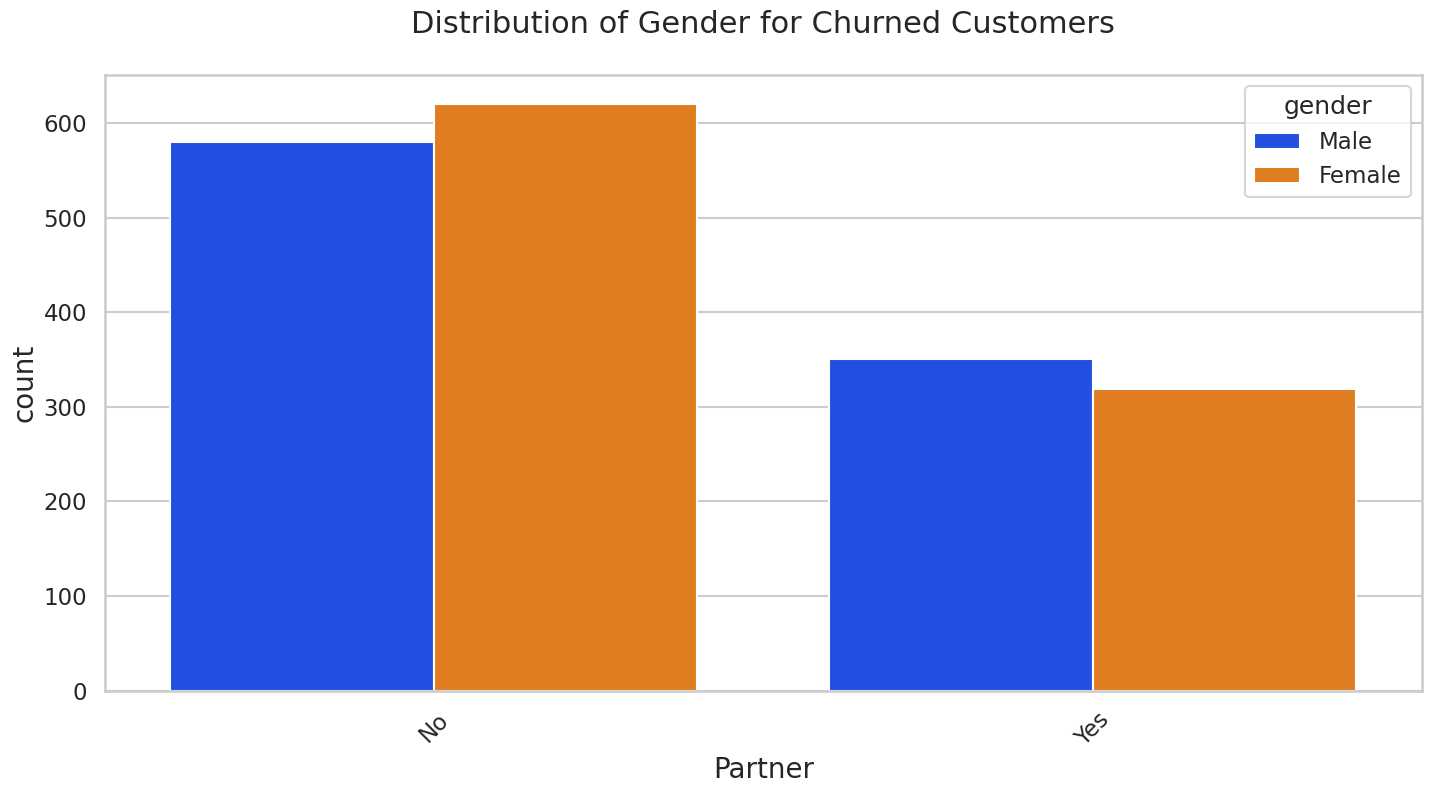

In [126]:
#Gender vs Partner for Churners
uniplot(new_df1_target1,col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')


Insight:

Female Customers who have a partner are more likely to churn

Male Customers with a partner are more likely to churn than female with a partner




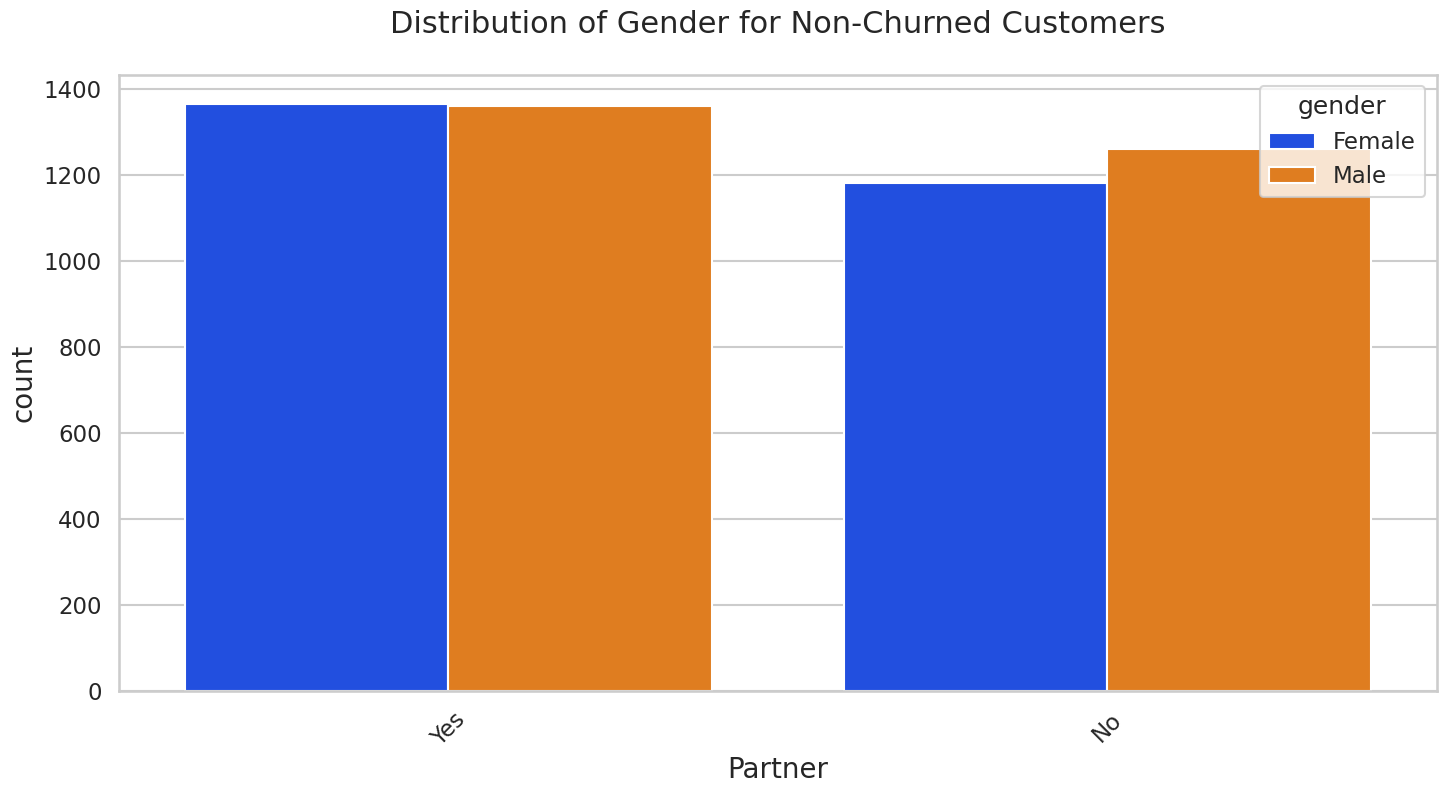

In [127]:
#Gender vs Partner for Non-Churners
uniplot(new_df1_target0,col='Partner', title='Distribution of Gender for Non-Churned Customers', hue='gender')

Insight:

Female Customers who do not have a partner are less likely to churn than males with a partner

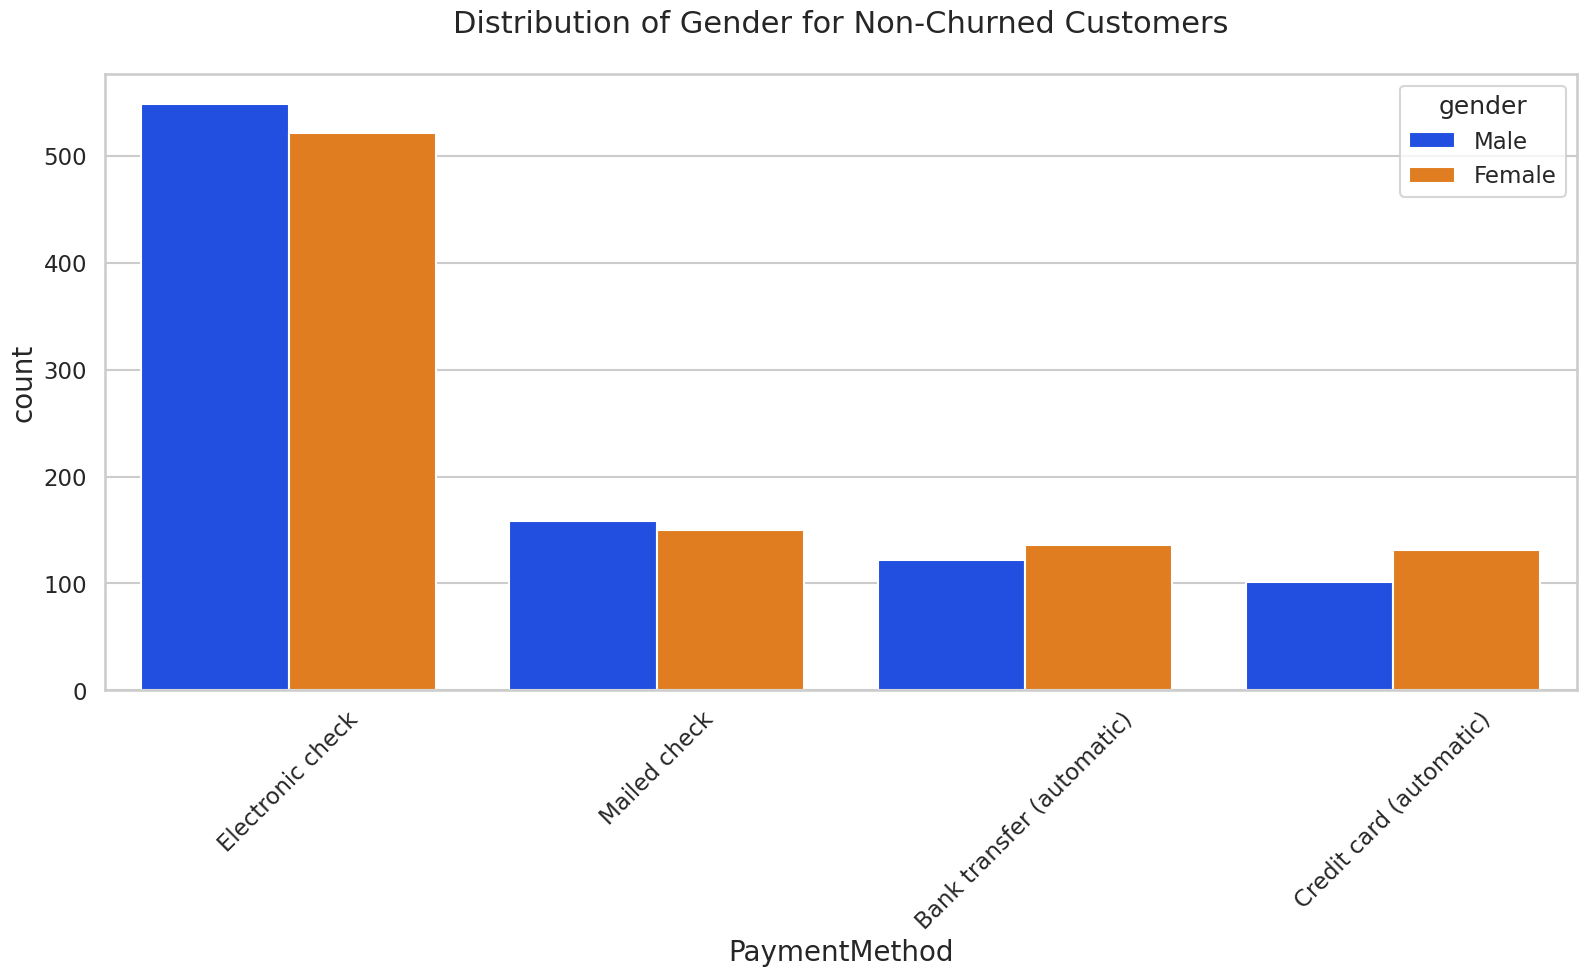

In [128]:
#Gender vs PaymentMethod for Churners
uniplot(new_df1_target1,col='PaymentMethod', title='Distribution of Gender for Non-Churned Customers', hue='gender')



Insight:

Female Customers who pay with Credit Card churn more than Males paying with credit card

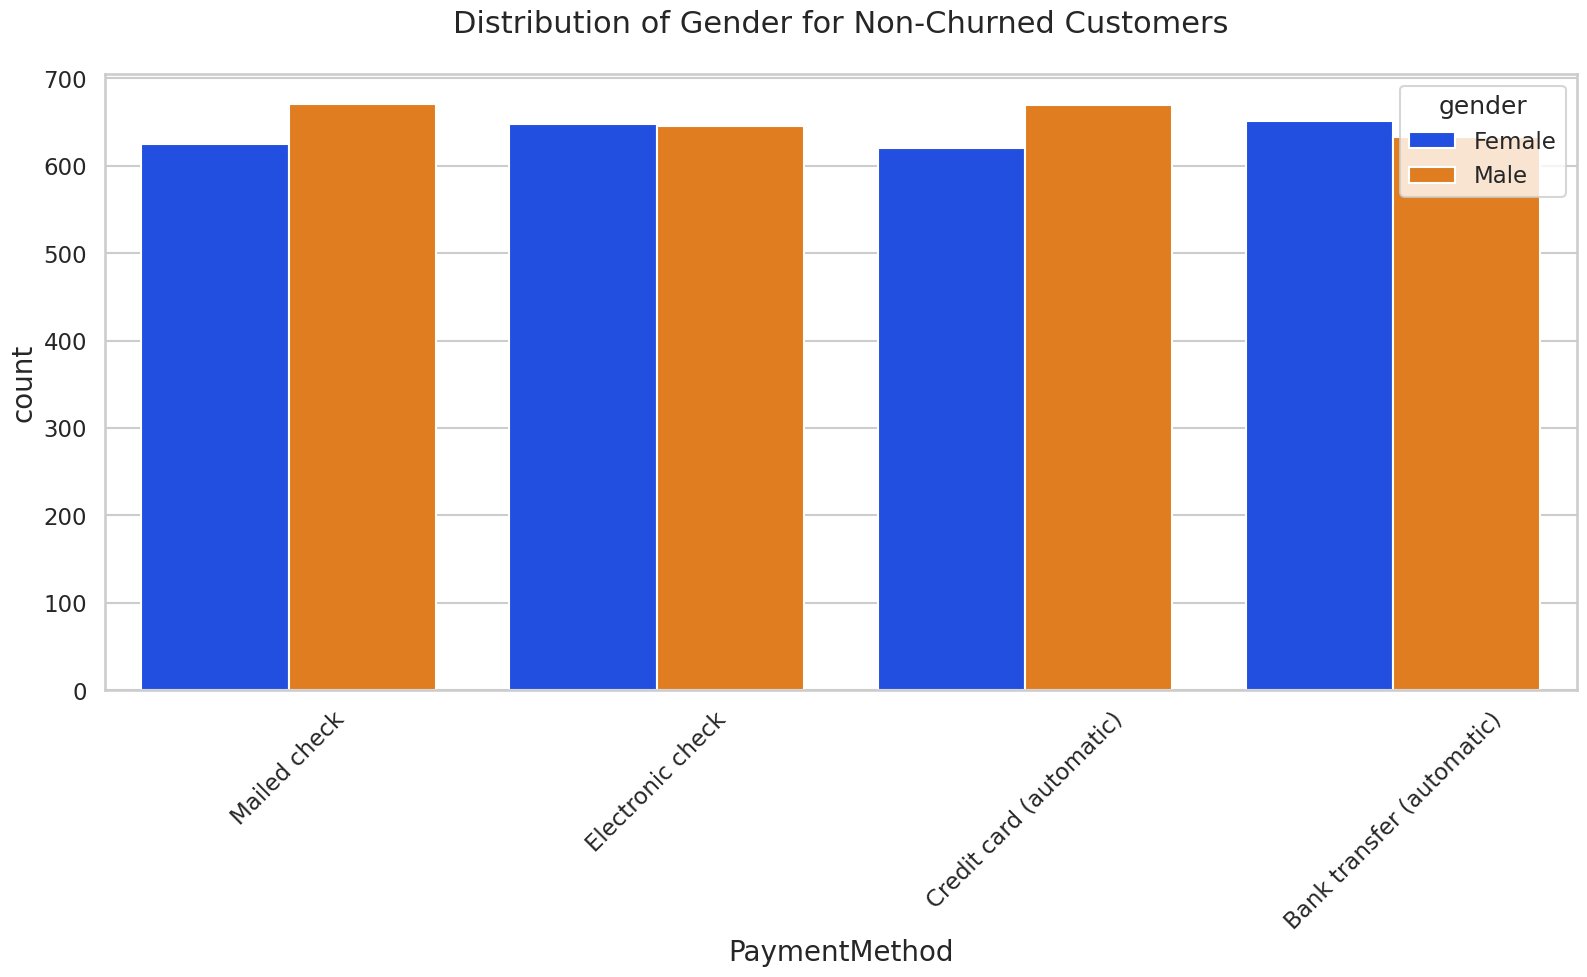

In [129]:
#Gender vs Payment for Non-Churners
uniplot(new_df1_target0,col='PaymentMethod', title='Distribution of Gender for Non-Churned Customers', hue='gender')


Insight:

Female Customers who pay by mailed check are less likely to churn than male customers.

#*Conclusion*




1. Customers without a partner have a higher churn percentage.
2. Monthly contract users are significantly more likely to churn.
3. Customers paying via electronic check show the highest churn rates.
4. Despite a positive correlation between Monthly and Total Charges, churners tend to have lower total charges overall.
5. High churners generally have low tenure.
6. Female customers with a partner are more likely to churn.
7. Male customers with a partner churn more than female customers with a partner.
8. High-churn profiles: Month-to-month contracts, no online security, no tech support, tenure 1–12 months, fiber optic internet, electronic check payment, and no online backup.
9. Low-churn profiles: Two-year contracts and tenure group 61–72 months.
10. Female customers without a partner are less likely to churn than male customers with a partner.
11. Gender and phone service availability have negligible impact on churn.
12. Non-senior citizens exhibit higher churn rates.
